<a href="https://colab.research.google.com/github/dimakpa/ML_Projects/blob/main/AdaBoostRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Алгоритм регрессии AdaBoost на решающих деревьях

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

np.random.seed(123)

x = np.arange(0, np.pi/2, 0.1).reshape(-1, 1)
y = np.sin(x) + np.random.normal(0, 0.2, x.shape)

Будем использовать данные значения

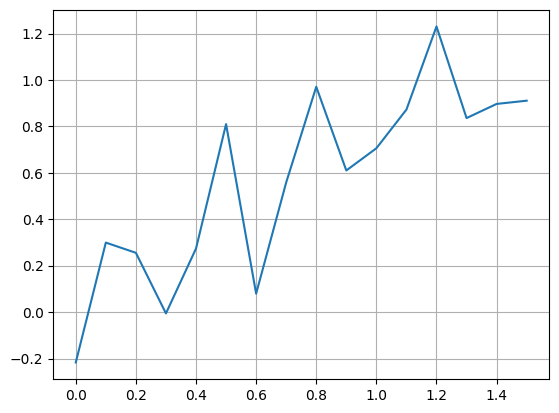

In [9]:
plt.plot(x, y)
plt.grid()
plt.show()

Процесс создания и обучения решающего дерева + пересчитывание остатков

In [19]:
T = 5                   # число алгоритмов в композиции
max_depth = 2           # максимальная глубина решающих деревьев
algs = []               # список из полученных алгоритмов
s = np.array(y.ravel()) # остатки,. которые изначально равны значениям y

for n in range(T):
    # создаем и обучаем решающее дерево
    algs.append(DecisionTreeRegressor(max_depth=max_depth))
    algs[-1].fit(x, s) # обучаем по выборке, на вход х, на выходе будем апроксимировать остатки s

    s -= algs[-1].predict(x)    # пересчитываем остатки (уменьшаем). то есть каждое новое дерево должно хорошо описывать остатки

Восстановление исходного сигнала по набору полученных данных

In [20]:
yy = algs[0].predict(x)
for n in range(1, T):
    yy += algs[n].predict(x)

Отобразим

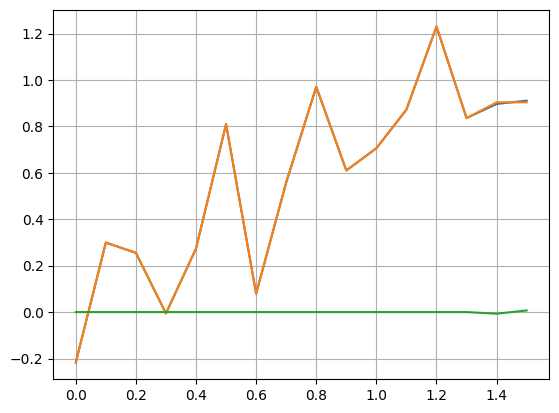

In [21]:
plt.plot(x, y)      # исходный график
plt.plot(x, yy)     # восстановленный график
plt.plot(x, s)      # остаточный сигнал (разница) чем ровнее, тем лучше
plt.grid()
plt.show()

Увеличение глубины дерева и числа алгоритмов увеличивает точность предсказаний